In [1]:
# Data vitualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Data Analysis Libraries
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
#!pip install xgboost

## ASSESSING DATA

In [5]:
# Reading data
df= pd.read_csv(r"C:\Users\DELL PRO\Downloads\Train (1) Gomart.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [9]:
# Data imformation and summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [11]:
# Checking for duplicates
df.duplicated().sum()

0

In [13]:
# Checking for missing features
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [14]:
# Statistical distribution of numerical features
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [15]:
# Statistical distribution of categorical features
df.describe(exclude= ['int64','float64'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis


<Axes: xlabel='Warehouse_block', ylabel='count'>

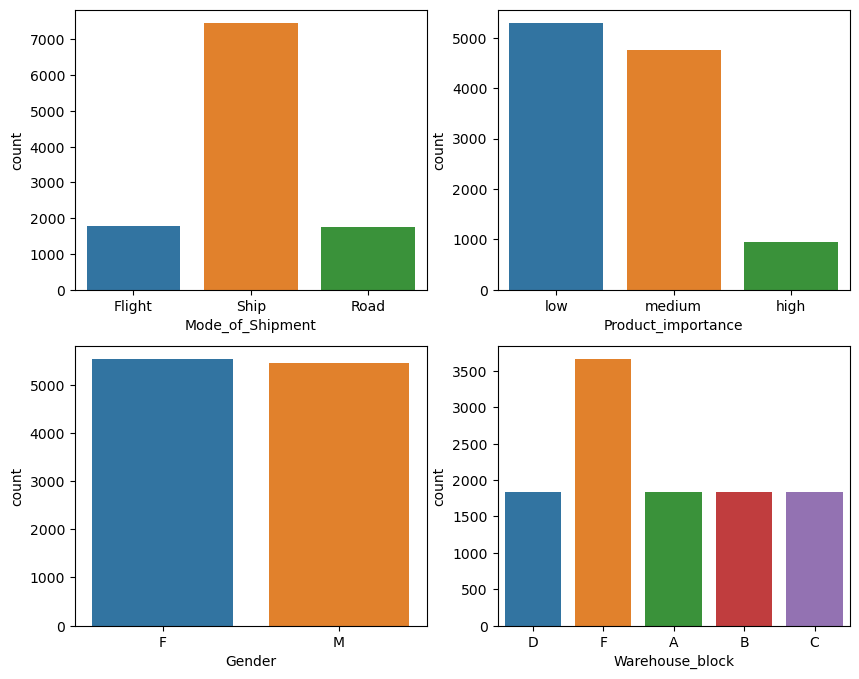

In [24]:
fig,axs= plt.subplots(nrows=2,ncols=2,figsize=(10,8))
# Univariate shipment mode plot 
sns.countplot(data=df,x='Mode_of_Shipment',ax=axs[0,0])

# Univariate Product_importance plot 
sns.countplot(data=df,x='Product_importance',ax=axs[0,1])

# Univariate Gender plot 
sns.countplot(data=df,x='Gender',ax=axs[1,0])

# Univariate Warehouse_block plot 
sns.countplot(data=df,x='Warehouse_block',ax=axs[1,1])


## OBSERVATION
. Ship mode is most used for products shipment with over 7000 value 

. The low category in prducts of importance has the highest value of over 5000

. Female and male gender have approximately the same number in products shipment

. Block F has the best warehouse for product shipment

Text(0.5, 1.0, 'Time product reached the customers')

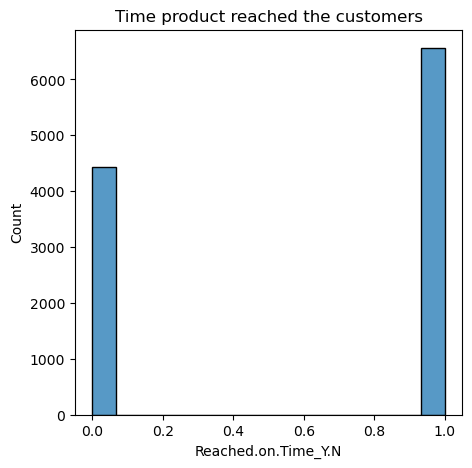

In [26]:
# Univariate plot of dependant feature(Reached.on.Time_Y.N)
plt.figure(figsize=(5,5))
sns.histplot(data=df,x='Reached.on.Time_Y.N')
plt.title('Time product reached the customers')



## Observation
. It was observed that higher numbers of products are not reaching customers 

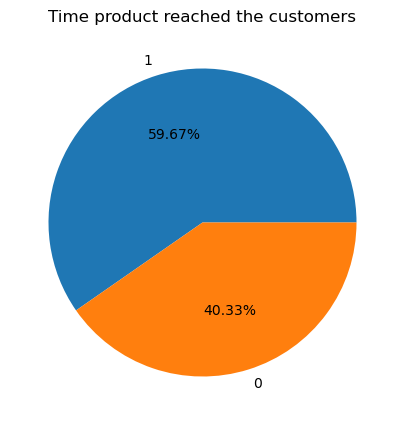

In [30]:
fig,ax = plt.subplots(figsize=(5,5))
count= Counter(df['Reached.on.Time_Y.N'])
ax.pie(count.values(), labels=count.keys(), autopct= lambda p:f'{p:.2f}%')
ax.set_title('Time product reached the customers');

Observation

. It was observed that the percentage of products not reaching the customers is 59.67%,higher than products reaching the customers

## Bivariate Analysis

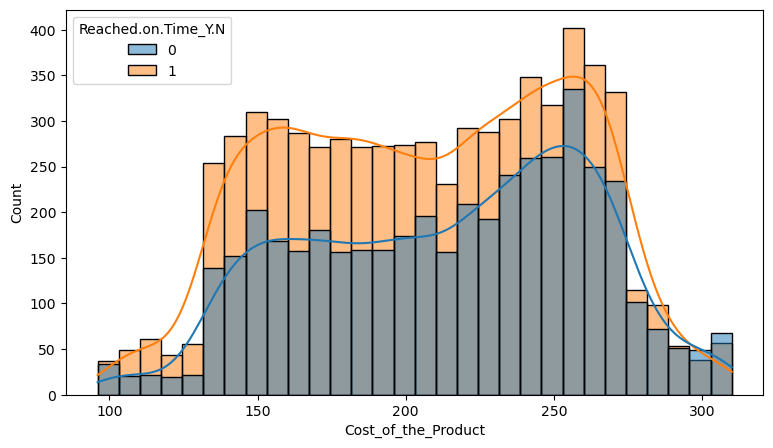

In [32]:
#comparing distributions of the cost of product feature & dependent feature
plt.figure(figsize=(9,5))
sb.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",kde=True);

### Observation
. The products between the cost of 130 and 270 are mostly not reaching the customers on time

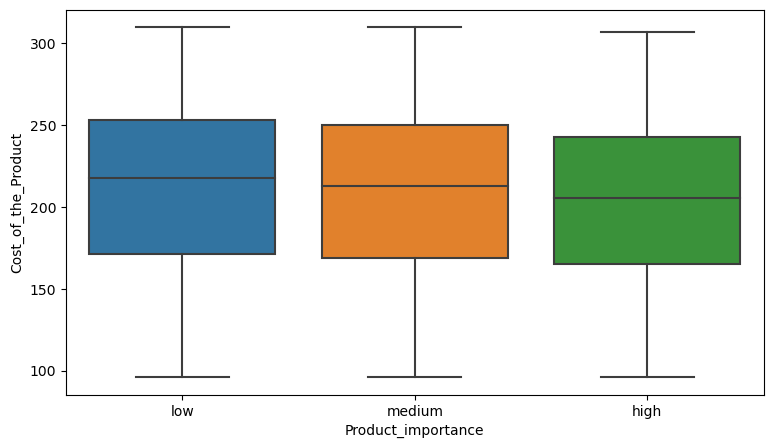

In [38]:
#comparing distributions of the cost of product feature & product importance
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="Product_importance",y="Cost_of_the_Product");

## Observation
. There is no outliers in the relationship of cost of the products and prduct importance.

. Low category in product importance has the highest cost of the product.

## Multivariate Analysis

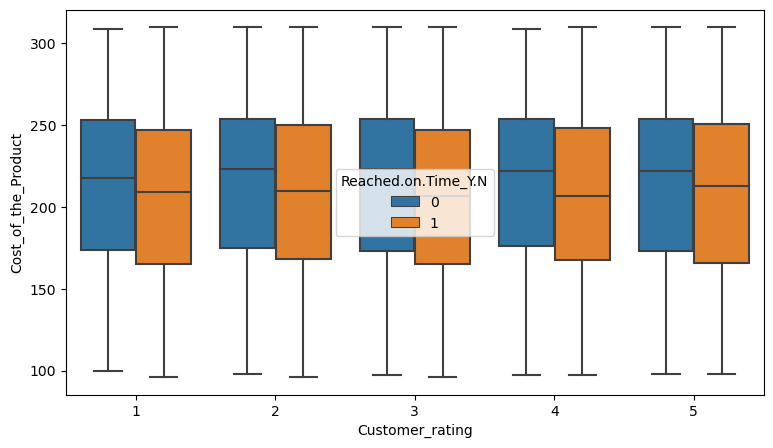

In [44]:
#distribution of the cost of product feature vs customer rating vs dependent feature
plt.figure(figsize=(9,5))
sns.boxplot(data=df, y="Cost_of_the_Product",x='Customer_rating',hue="Reached.on.Time_Y.N");

## Observation

. There is no outliers in the relationship of the cost of the products, customer rating and reaching on time of the products.

. The reaching time of the products to customers is almost the same in the distribution of customer rating and the cost of the products

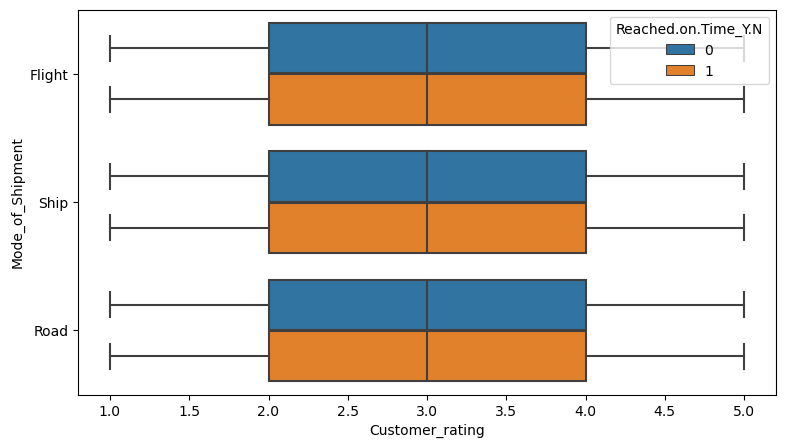

In [51]:
#distribution of the mode of shipment vs customer rating vs dependent feature
plt.figure(figsize=(9,5))
sns.boxplot(data=df, y="Mode_of_Shipment",x='Customer_rating',hue="Reached.on.Time_Y.N");

## Observation

. There is no outliers in the relationship of the shipment mode, customer rating and reaching on time of the products.

. The reaching time of the products to customers is the same in the distribution of customer rating and shipment mode

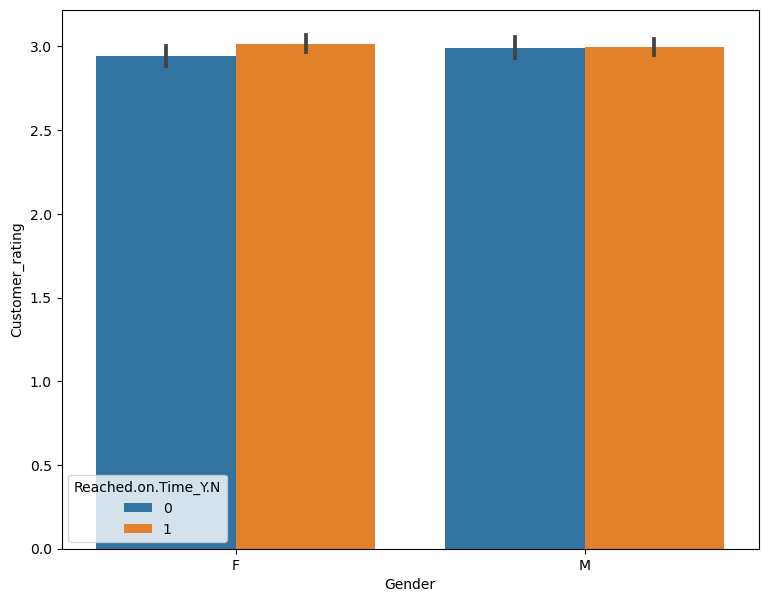

In [49]:
#distribution of the cost of product feature vs customer rating vs dependent feature
plt.figure(figsize=(9,7))
sns.barplot(data=df, y="Customer_rating",x='Gender',hue="Reached.on.Time_Y.N");

## Observation

. The products are not slightly reaching to female on time in relationship with customer rating.


In [6]:
# Dropping the redundant features
df= df.drop('ID', axis=1)

## SUPERVISED MACHINE LEARNING SECTION
- DATA PROCESSING; FEATURE ENGINEERING, ENCODING,SCALING, DATA SPLITTING
- DATA MODELLING
- METRICS EVALUATION

In [7]:
# Segmenting the data features
df2= df.drop("Reached.on.Time_Y.N", axis=1)
target= df["Reached.on.Time_Y.N"]

In [8]:
# Converting categorical to numerical distribution: Encoding
# Method Initializtion
from sklearn.preprocessing import LabelEncoder
# Instantiating tthe method
encoder= LabelEncoder()
# looping in columns
for i in df2.columns:
    if(df2[i].dtype=='object'):
        df2[i]= encoder.fit_transform(df2[i])
    else:
        df2[i]=df2[i]
# df2.head()

In [9]:
# Scaling the dataset using library
from sklearn.preprocessing import MinMaxScaler
# Method Initialization
scaler= MinMaxScaler()
df2_scaled= scaler.fit_transform(df2)
# df2_scaled

In [10]:
# Splitting the data to training and evaluation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df2_scaled, target, test_size=0.33, random_state=42)

# Model Building
# classifier libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [14]:
# Method Initialization
xgb= XGBClassifier()
random= RandomForestClassifier()
kneigh= KNeighborsClassifier()
sgd= SGDClassifier()
svcc= SVC()
gauss= GaussianNB()
decision= DecisionTreeClassifier()
logic= LogisticRegression()

# Fitting for model training
xgb.fit(X_train,y_train)
random.fit(X_train,y_train)
kneigh.fit(X_train,y_train)
sgd.fit(X_train,y_train)
svcc.fit(X_train,y_train)
gauss.fit(X_train,y_train)
decision.fit(X_train,y_train)
logic.fit(X_train,y_train)

# Model Prediction
xgb_pred= xgb.predict(X_test)
random_pred= random.predict(X_test)
kneigh_pred= kneigh.predict(X_test)
sgd_pred= sgd.predict(X_test)
svcc_pred= svcc.predict(X_test)
gauss_pred= gauss.predict(X_test)
decision_pred= decision.predict(X_test)
logic_pred= logic.predict(X_test)

# Model Evaluation Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

# Simplifying the models
models= ['XGBClassifier','RandomForestClassifier','KNeighborsClassifier','SGDClassifier','SVC','GaussianNB','DecisionTreeClassifier','LogisticRegression']

# Printing of evaluation metrics for XGBClassifier
acc_sc= accuracy_score(y_test,xgb_pred) 
pre_sc= precision_score(y_test,xgb_pred)
rec_sc= recall_score(y_test,xgb_pred)
f1_sc= f1_score(y_test,xgb_pred)
r_a_sc= roc_auc_score(y_test,xgb_pred)

# Printing
print('XGBClassifier')
print(f'The accuracy score for {models[0]} is {acc_sc}')
print(f'The precision score for {models[0]} is {pre_sc}')
print(f'The recall score for{models[0]} is {rec_sc}')
print(f'The f1 score for{models[0]} is {f1_sc}')
print(f'The roc auc score for{models[0]} is {r_a_sc}')






XGBClassifier
The accuracy score for XGBClassifier is 0.6663911845730027
The precision score for XGBClassifier is 0.7483409903011741
The recall score forXGBClassifier is 0.6712454212454212
The f1 score forXGBClassifier is 0.7076997344919141
The roc auc score forXGBClassifier is 0.6651524478287963


In [16]:
# Printing of evaluation metrics for RandomForestClassifier
acc_sc= accuracy_score(y_test,random_pred) 
pre_sc= precision_score(y_test,random_pred)
rec_sc= recall_score(y_test,random_pred)
f1_sc= f1_score(y_test,random_pred)
r_a_sc= roc_auc_score(y_test,random_pred)

# Printing
print('RandomForestClassifier')
print(f'The accuracy score for {models[1]} is {acc_sc}')
print(f'The precision score for {models[1]} is {pre_sc}')
print(f'The recall score for{models[1]} is {rec_sc}')
print(f'The f1 score for{models[1]} is {f1_sc}')
print(f'The roc auc score for{models[1]} is {r_a_sc}')


RandomForestClassifier
The accuracy score for RandomForestClassifier is 0.6702479338842975
The precision score for RandomForestClassifier is 0.7752370329057445
The recall score forRandomForestClassifier is 0.6364468864468864
The f1 score forRandomForestClassifier is 0.6990193613276339
The roc auc score forRandomForestClassifier is 0.6788735123797365


In [17]:
# Printing of evaluation metrics for KNeighborsClassifier
acc_sc= accuracy_score(y_test,kneigh_pred) 
pre_sc= precision_score(y_test,kneigh_pred)
rec_sc= recall_score(y_test,kneigh_pred)
f1_sc= f1_score(y_test,kneigh_pred)
r_a_sc= roc_auc_score(y_test,kneigh_pred)

# Printing
print('KNeighborsClassifier')
print(f'The accuracy score for {models[2]} is {acc_sc}')
print(f'The precision score for {models[2]} is {pre_sc}')
print(f'The recall score for{models[2]} is {rec_sc}')
print(f'The f1 score for{models[2]} is {f1_sc}')
print(f'The roc auc score for{models[2]} is {r_a_sc}')


KNeighborsClassifier
The accuracy score for KNeighborsClassifier is 0.6446280991735537
The precision score for KNeighborsClassifier is 0.7191176470588235
The recall score forKNeighborsClassifier is 0.6717032967032966
The f1 score forKNeighborsClassifier is 0.6946022727272727
The roc auc score forKNeighborsClassifier is 0.6377188682686608


In [18]:
# Printing of evaluation metrics for SGDClassifier
acc_sc= accuracy_score(y_test,sgd_pred) 
pre_sc= precision_score(y_test,sgd_pred)
rec_sc= recall_score(y_test,sgd_pred)
f1_sc= f1_score(y_test,sgd_pred)
r_a_sc= roc_auc_score(y_test,sgd_pred)

# Printing
print('SGDClassifier')
print(f'The accuracy score for {models[3]} is {acc_sc}')
print(f'The precision score for {models[3]} is {pre_sc}')
print(f'The recall score for{models[3]} is {rec_sc}')
print(f'The f1 score for{models[3]} is {f1_sc}')
print(f'The roc auc score for{models[3]} is {r_a_sc}')


SGDClassifier
The accuracy score for SGDClassifier is 0.6556473829201102
The precision score for SGDClassifier is 0.7166048237476809
The recall score forSGDClassifier is 0.7074175824175825
The f1 score forSGDClassifier is 0.7119815668202765
The roc auc score forSGDClassifier is 0.6424363154134939


In [19]:
# Printing of evaluation metrics for SVC
acc_sc= accuracy_score(y_test,svcc_pred) 
pre_sc= precision_score(y_test,svcc_pred)
rec_sc= recall_score(y_test,svcc_pred)
f1_sc= f1_score(y_test,svcc_pred)
r_a_sc= roc_auc_score(y_test,svcc_pred)

# Printing
print('SVC')
print(f'The accuracy score for {models[4]} is {acc_sc}')
print(f'The precision score for {models[4]} is {pre_sc}')
print(f'The recall score for{models[4]} is {rec_sc}')
print(f'The f1 score for{models[4]} is {f1_sc}')
print(f'The roc auc score for{models[4]} is {r_a_sc}')


SVC
The accuracy score for SVC is 0.6622589531680441
The precision score for SVC is 0.8143044619422573
The recall score forSVC is 0.5682234432234432
The f1 score forSVC is 0.6693635382955772
The roc auc score forSVC is 0.6862555667016248


In [20]:
# Printing of evaluation metrics for GaussianNB
acc_sc= accuracy_score(y_test,gauss_pred) 
pre_sc= precision_score(y_test,gauss_pred)
rec_sc= recall_score(y_test,gauss_pred)
f1_sc= f1_score(y_test,gauss_pred)
r_a_sc= roc_auc_score(y_test,gauss_pred)

# Printing
print('GaussianNB')
print(f'The accuracy score for {models[5]} is {acc_sc}')
print(f'The precision score for {models[5]} is {pre_sc}')
print(f'The recall score for{models[5]} is {rec_sc}')
print(f'The f1 score for{models[5]} is {f1_sc}')
print(f'The roc auc score for{models[5]} is {r_a_sc}')


GaussianNB
The accuracy score for GaussianNB is 0.6506887052341598
The precision score for GaussianNB is 0.9821052631578947
The recall score forGaussianNB is 0.4271978021978022
The f1 score forGaussianNB is 0.595405232929164
The roc auc score forGaussianNB is 0.7077206161749731


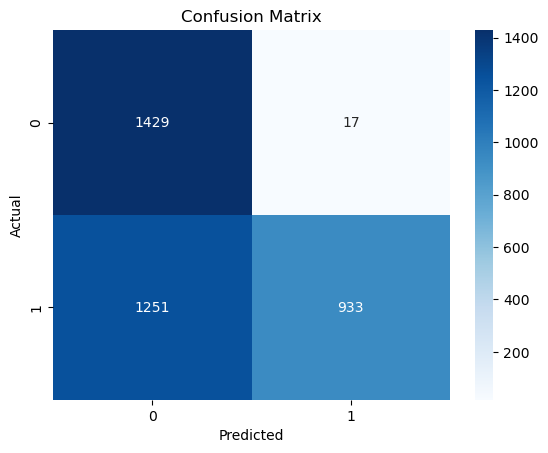

In [24]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,gauss_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Observation on confusion matrix
## 0 = Products are reaching customers on time
## 1 = Products are not reaching customers on time

. 1429 products are actually predicted to reach the customers.
. 933 products are actually predicted not to reach the customers.
. 1251 products are falsely predicted to reach the customers.
. 17 products are falsely predicted not to reach the customers.

GaussianNB model has the best precision performance metrics 0.98 in comparison with others. 


In [21]:
# Printing of evaluation metrics for DecisionTreeClassifier
acc_sc= accuracy_score(y_test,decision_pred) 
pre_sc= precision_score(y_test,decision_pred)
rec_sc= recall_score(y_test,decision_pred)
f1_sc= f1_score(y_test,decision_pred)
r_a_sc= roc_auc_score(y_test,decision_pred)

# Printing
print('DecisionTreeClassifier')
print(f'The accuracy score for {models[6]} is {acc_sc}')
print(f'The precision score for {models[6]} is {pre_sc}')
print(f'The recall score for{models[6]} is {rec_sc}')
print(f'The f1 score for{models[6]} is {f1_sc}')
print(f'The roc auc score for{models[6]} is {r_a_sc}')


DecisionTreeClassifier
The accuracy score for DecisionTreeClassifier is 0.6498622589531681
The precision score for DecisionTreeClassifier is 0.7079726651480638
The recall score forDecisionTreeClassifier is 0.7115384615384616
The f1 score forDecisionTreeClassifier is 0.7097510847225396
The roc auc score forDecisionTreeClassifier is 0.6341233109905309


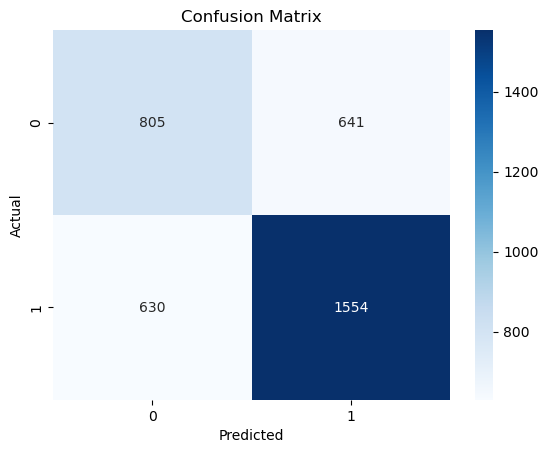

In [25]:
# Create a confusion matrix
c_mat= confusion_matrix(y_test,decision_pred)
#vitualise the confusion matrix
sns.heatmap(c_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Observation on confusion matrix
## 0 = Products are reaching customers on time
## 1 = Products are not reaching customers on time

. 805 products are actually predicted to reach the customers.
. 1554 products are actually predicted not to reach the customers.
. 630 products are falsely predicted to reach the customers.
. 641 products are falsely predicted not to reach the customers.

DecisionTreeClassifier model has the best recal performance metrics 0.71 in comparison with others. 


In [23]:
# Printing of evaluation metrics for LogisticRegression
acc_sc= accuracy_score(y_test,logic_pred) 
pre_sc= precision_score(y_test,logic_pred)
rec_sc= recall_score(y_test,logic_pred)
f1_sc= f1_score(y_test,logic_pred)
r_a_sc= roc_auc_score(y_test,logic_pred)

# Printing
print('LogisticRegression')
print(f'The accuracy score for {models[7]} is {acc_sc}')
print(f'The precision score for {models[7]} is {pre_sc}')
print(f'The recall score for{models[7]} is {rec_sc}')
print(f'The f1 score for{models[7]} is {f1_sc}')
print(f'The roc auc score for{models[7]} is {r_a_sc}')


LogisticRegression
The accuracy score for LogisticRegression is 0.6363636363636364
The precision score for LogisticRegression is 0.7020579981290926
The recall score forLogisticRegression is 0.6872710622710623
The f1 score forLogisticRegression is 0.6945858398889404
The roc auc score forLogisticRegression is 0.623372737221285


## RECOMMENDATIONS
. Hyperparameter tuning is required for better performance on the best Decision Tree Cllassifier model in recall performance metrics.

. Productionizing the best models before deployment 

. Discount strategy could potentially impact customer behavior to improve  sales and customer satisfaction.

. Products with "low" importance were more common in the dataset, products importance and opportunities should be offered to products with higher importance to diversify product portfolio.

. Marketing strategy should be implemented on delivery modes to consistently enhance customer ratings forfaster delivery on other modes aside ship mode..